# Payment Date Prediction

## H2HBABBA2452 Ritik Banerjee House Chandler

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#First we import the given data set
data=pd.read_csv("H2HBABBA2452.csv")
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-07-25 00:00:00,2019.0,1.929612e+09,2019-07-15,20190712,20190715,20190730.0,USD,RV,1.0,NaN,15426.79,20190715.0,NAH4,1.929612e+09,0
1,U001,0200782001,GORDO associates,2019-04-30 00:00:00,2019.0,1.929120e+09,2019-04-10,20190410,20190410,20190425.0,USD,RV,1.0,NaN,22297.05,20190410.0,NAA8,1.929120e+09,0
2,U001,0200706844,WINC corp,2020-02-14 00:00:00,2020.0,1.930458e+09,2020-01-30,20200130,20200130,20200214.0,USD,RV,1.0,NaN,50748.00,20200130.0,NAA8,1.930458e+09,0
3,U001,CCCA02,KRAFT associates,2019-09-27 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190926.0,USD,RV,1.0,NaN,752.72,20190822.0,NAG2,1.929776e+09,0
4,U001,0200769623,WAL-MAR us,2019-01-30 00:00:00,2019.0,1.928648e+09,2019-01-19,20190119,20190119,20190203.0,USD,RV,1.0,NaN,35892.12,20190119.0,NAH4,1.928648e+09,0


In [3]:
#checking for null values in main dataset
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [4]:
#as all values of area_buisness are null so no need to keep it
data.drop(["area_business"],axis=1,inplace=True)

In [5]:
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [6]:
#Changing all the dates to date time objects
data['clear_date']=pd.to_datetime(data['clear_date'])
data['posting_date']=pd.to_datetime(data['posting_date'])
data['document_create_date']=pd.to_datetime(data['document_create_date'],format='%Y%m%d')
data['document_create_date.1']=pd.to_datetime(data['document_create_date.1'],format='%Y%m%d')
data['due_in_date']=pd.to_datetime(data['due_in_date'],format='%Y%m%d')
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'],format='%Y%m%d')
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [7]:
#sorting the values according to posting date
data.sort_values(by="posting_date",inplace=True)

In [8]:
#now splittingthe data so that one part has all the null values in clear date and other part we can use for training
test_data=data.loc[data.clear_date.isnull(),:]
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10723,U001,0200772670,ASSOCIAT corporation,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,2467.53,2020-02-27,NAU5,1.930577e+09,1
26418,U001,0200761734,H E BUT systems,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,53703.88,2020-02-27,NAA8,1.930578e+09,1
10123,U001,0200749225,SUPER associates,NaT,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,44436.71,2020-02-27,NAA8,1.930574e+09,1
97,U001,0200759878,SA corporation,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,39867.72,2020-02-27,NAH4,1.930577e+09,1
8658,U001,0200723794,MID MO associates,NaT,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-05-02,USD,RV,1.0,21631.84,2020-02-27,NAGD,1.930576e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44647,CA02,0140104392,FLANAG llc,NaT,2020.0,2.960634e+09,2020-05-14,2020-05-14,2020-05-14,2020-05-24,CAD,RV,1.0,7032.80,2020-05-14,CA10,2.960634e+09,1
30814,U001,0200915438,GROC corporation,NaT,2020.0,1.930905e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,24212.00,2020-05-15,NAA8,1.930905e+09,1
5065,U001,0200759878,SA associates,NaT,2020.0,1.930897e+09,2020-05-17,2020-05-13,2020-05-17,2020-06-01,USD,RV,1.0,22835.50,2020-05-17,NAH4,1.930897e+09,1
9870,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,USD,RV,1.0,16099.20,2020-05-18,NAA8,1.930915e+09,1


In [9]:
train_data=data.loc[data.clear_date.notnull(),:]
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
17979,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,10474.46,2018-12-30,NAH4,1.928540e+09,0
49200,U013,0140103335,PARAM associates,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-26,2018-12-30,2019-01-29,USD,RV,1.0,10045.23,2018-12-30,NAVE,1.991819e+09,0
6748,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,33537.22,2018-12-30,NAH4,1.928538e+09,0
36062,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,32400.38,2018-12-30,NAH4,1.928543e+09,0
41510,U001,0200769623,WAL-MAR trust,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,3748.94,2018-12-30,NAH4,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12108,U001,0200706844,WINC corp,2020-03-12,2020.0,1.930572e+09,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,RV,1.0,43596.53,2020-02-26,NAA8,1.930572e+09,0
5497,U001,0200772670,ASSOCIAT foundation,2020-03-12,2020.0,1.930566e+09,2020-02-26,2020-02-25,2020-02-26,2020-03-12,USD,RV,1.0,10004.44,2020-02-26,NAU5,1.930566e+09,0
38891,U001,0200769623,WAL-MAR in,2020-03-16,2020.0,1.930569e+09,2020-02-26,2020-02-25,2020-02-26,2020-03-12,USD,RV,1.0,2376.95,2020-02-26,NAH4,1.930569e+09,0
28477,U001,0200759878,SA systems,2020-03-13,2020.0,1.930570e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,64190.53,2020-02-27,NAH4,1.930570e+09,0


# Preprocessing

In [10]:
#checking for all null values
train_data.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                1
isOpen                    0
dtype: int64

In [11]:
#as we can see the invoice_id and doc_id are similar other than the one null value we can infer that they are almost same so we can drop the invoice_id
same=train_data["invoice_id"]==train_data["doc_id"]
same.value_counts()


True     39999
False        1
dtype: int64

In [12]:
train_data.drop(["invoice_id"],axis=1,inplace=True)

In [13]:
train_data.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
dtype: int64

# Constant removal/Inconsistency Removal

In [14]:
#checking for all unique values present in all the columns
train_data.nunique()

business_code                 5
cust_number                1331
name_customer              3873
clear_date                  400
buisness_year                 2
doc_id                    39117
posting_date                424
document_create_date        426
document_create_date.1      424
due_in_date                 492
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         35587
baseline_create_date        434
cust_payment_terms           71
isOpen                        1
dtype: int64

In [15]:
#we can see that in posting_id and in isOpen the unique values are 1 we can infer that these are constant columns hence we can drop them
train_data.drop(["posting_id"],axis=1,inplace=True)
train_data.drop(["isOpen"],axis=1,inplace=True)

In [16]:
train_data.nunique()

business_code                 5
cust_number                1331
name_customer              3873
clear_date                  400
buisness_year                 2
doc_id                    39117
posting_date                424
document_create_date        426
document_create_date.1      424
due_in_date                 492
invoice_currency              2
document type                 2
total_open_amount         35587
baseline_create_date        434
cust_payment_terms           71
dtype: int64

In [17]:
#we can surely say that the date for creating the invoice document will always be greater or equal to the date invoice is created(baseline create date) 
#if baseline create date is greater than that means rows are inconsistent hence we should drop those rows
train_data.drop(train_data[train_data['document_create_date.1']<train_data['baseline_create_date']].index,axis=0,inplace=True)

In [18]:
#the due_in_date will be created only after the document is created
train_data.drop(train_data[train_data['due_in_date']<train_data['document_create_date.1']].index,axis=0,inplace=True)

In [19]:
#creating the delay column **target column**
train_data["delay"]=(train_data["clear_date"]-train_data["due_in_date"]).dt.days
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
17979,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,10474.46,2018-12-30,NAH4,-5
49200,U013,0140103335,PARAM associates,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-26,2018-12-30,2019-01-29,USD,RV,10045.23,2018-12-30,NAVE,-6
6748,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,33537.22,2018-12-30,NAH4,-5
36062,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,32400.38,2018-12-30,NAH4,-5
41510,U001,0200769623,WAL-MAR trust,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,3748.94,2018-12-30,NAH4,1


# Splitting data

In [20]:
#splitting the data into train,validation and test set
X=train_data.drop("delay",axis=1)
Y=train_data["delay"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,shuffle=False)

In [23]:
X_train.shape

(29880, 15)

In [24]:
x_val,x_test,y_val,y_test=train_test_split(X_test,Y_test,test_size=0.5,random_state=0,shuffle=False)

In [25]:
x_val.shape

(3735, 15)

# EDA

<AxesSubplot:ylabel='Density'>

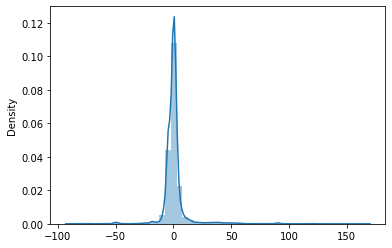

In [26]:
sns.distplot(x=Y_train)
#This shows that our delay column is right skewed

In [27]:
X_train.merge(Y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,17979,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,10474.46,2018-12-30,NAH4,-5
1,49200,U013,0140103335,PARAM associates,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-26,2018-12-30,2019-01-29,USD,RV,10045.23,2018-12-30,NAVE,-6
2,6748,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,33537.22,2018-12-30,NAH4,-5
3,36062,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,32400.38,2018-12-30,NAH4,-5
4,41510,U001,0200769623,WAL-MAR trust,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,3748.94,2018-12-30,NAH4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29875,24027,U001,0200769623,WAL-MAR llc,2019-11-29,2019.0,1.930162e+09,2019-11-18,2019-11-16,2019-11-18,2019-12-03,USD,RV,14685.38,2019-11-18,NAH4,-4
29876,36710,U001,0200769623,WAL-MAR systems,2019-12-02,2019.0,1.930164e+09,2019-11-18,2019-11-17,2019-11-18,2019-12-03,USD,RV,50527.66,2019-11-18,NAH4,-1
29877,44686,U001,0200799342,MITCH corporation,2019-12-03,2019.0,1.930163e+09,2019-11-18,2019-11-17,2019-11-18,2019-12-03,USD,RV,149542.63,2019-11-18,NAA8,0
29878,1492,U001,0200769623,WAL-MAR,2019-11-29,2019.0,1.930164e+09,2019-11-18,2019-11-18,2019-11-18,2019-12-03,USD,RV,50952.97,2019-11-18,NAH4,-4


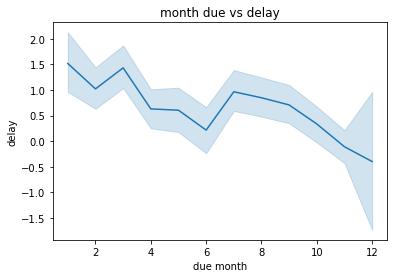

In [28]:
#here we are checking the relation between month of due date to the delay we can say that as month increases delay decreases
sns.lineplot(X_train.merge(Y_train,on = X_train.index)["due_in_date"].dt.month,X_train.merge(Y_train,on = X_train.index)["delay"])
plt.xlabel("due month")
plt.ylabel("delay")
plt.title("month due vs delay")
plt.show()

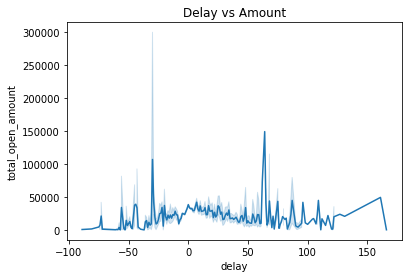

In [29]:
#plot between delay and amount the graph does not show any clear pattern
sns.lineplot(X_train.merge(Y_train,on = X_train.index)["delay"],X_train.merge(Y_train,on = X_train.index)["total_open_amount"])
plt.title("Delay vs Amount")
plt.xlabel("delay")
plt.ylabel("total_open_amount")
plt.show()

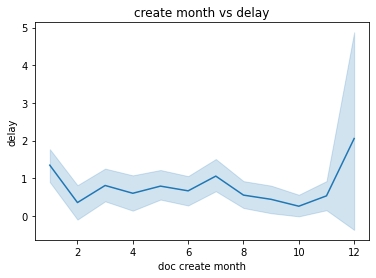

In [30]:
#we cansee from this graph there is a rise in delay after october this maybe because of the holiday months
sns.lineplot(X_train.merge(Y_train,on = X_train.index)['document_create_date.1'].dt.month, X_train.merge(Y_train,on = X_train.index)['delay'])
plt.xlabel("doc create month")
plt.ylabel("delay")
plt.title("create month vs delay")
plt.show()

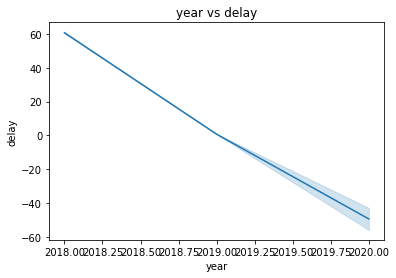

In [31]:
#we can see asteady decline in delay as the year increases
sns.lineplot(X_train.merge(Y_train,on = X_train.index)['due_in_date'].dt.year, X_train.merge(Y_train,on = X_train.index)['delay'])
plt.xlabel("year")
plt.ylabel("delay")
plt.title("year vs delay")
plt.show()

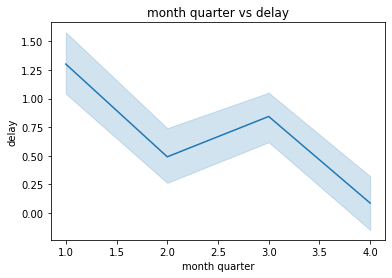

In [32]:
#we can see a steady decline here also but there was a rise in delay between the 2nd and 3rd quarter
sns.lineplot(X_train.merge(Y_train,on = X_train.index)['due_in_date'].dt.quarter, X_train.merge(Y_train,on = X_train.index)['delay'])
plt.xlabel("month quarter")
plt.ylabel("delay")
plt.title("month quarter vs delay")
plt.show()

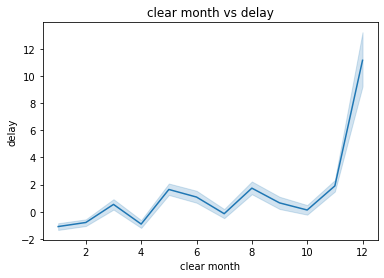

In [33]:
#we can see a huge increase in delay after october
sns.lineplot(X_train.merge(Y_train,on = X_train.index)['clear_date'].dt.month, X_train.merge(Y_train,on = X_train.index)['delay'])
plt.xlabel("clear month")
plt.ylabel("delay")
plt.title("clear month vs delay")
plt.show()

# Feature Engineering

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           29880 non-null  object        
 1   cust_number             29880 non-null  object        
 2   name_customer           29880 non-null  object        
 3   clear_date              29880 non-null  datetime64[ns]
 4   buisness_year           29880 non-null  float64       
 5   doc_id                  29880 non-null  float64       
 6   posting_date            29880 non-null  datetime64[ns]
 7   document_create_date    29880 non-null  datetime64[ns]
 8   document_create_date.1  29880 non-null  datetime64[ns]
 9   due_in_date             29880 non-null  datetime64[ns]
 10  invoice_currency        29880 non-null  object        
 11  document type           29880 non-null  object        
 12  total_open_amount       29880 non-null  fl

In [35]:
#first we create two new colums named time_to_make_doc and days after document as delay is related to due_in_date which is related to document_create_date.1 
X_train["time_to_mak_doc"]=(X_train["document_create_date.1"]-X_train["baseline_create_date"]).dt.days

In [36]:
x_test["time_to_mak_doc"]=(x_test["document_create_date.1"]-x_test["baseline_create_date"]).dt.days
x_val["time_to_mak_doc"]=(x_val["document_create_date.1"]-x_val["baseline_create_date"]).dt.days

In [37]:
X_train['days_after_document']=(X_train['due_in_date']-X_train['document_create_date.1']).dt.days

In [38]:
x_test['days_after_document']=(x_test['due_in_date']-x_test['document_create_date.1']).dt.days
x_val['days_after_document']=(x_val['due_in_date']-x_val['document_create_date.1']).dt.days

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           29880 non-null  object        
 1   cust_number             29880 non-null  object        
 2   name_customer           29880 non-null  object        
 3   clear_date              29880 non-null  datetime64[ns]
 4   buisness_year           29880 non-null  float64       
 5   doc_id                  29880 non-null  float64       
 6   posting_date            29880 non-null  datetime64[ns]
 7   document_create_date    29880 non-null  datetime64[ns]
 8   document_create_date.1  29880 non-null  datetime64[ns]
 9   due_in_date             29880 non-null  datetime64[ns]
 10  invoice_currency        29880 non-null  object        
 11  document type           29880 non-null  object        
 12  total_open_amount       29880 non-null  fl

## Business code

In [40]:
#as we can see there are only 5 unique values in business_code we can easily encode them using label encoder
X_train["business_code"].nunique()

5

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
X_train["business_code"]

17979    U001
49200    U013
6748     U001
36062    U001
41510    U001
         ... 
24027    U001
36710    U001
44686    U001
1492     U001
48109    U001
Name: business_code, Length: 29880, dtype: object

In [43]:
Business_encoder = LabelEncoder()
Business_encoder.fit(X_train['business_code'])
X_train['Business_enc'] = Business_encoder.transform(X_train['business_code'])

In [44]:
x_test['Business_enc'] = Business_encoder.transform(x_test['business_code'])
x_val['Business_enc'] = Business_encoder.transform(x_val['business_code'])

In [45]:
X_train[['Business_enc','business_code']]

,Business_enc,business_code
17979,1,U001
49200,4,U013
6748,1,U001
36062,1,U001
41510,1,U001
...,...,...
24027,1,U001
36710,1,U001
44686,1,U001
1492,1,U001


In [46]:
X_train.drop(["business_code"],axis=1,inplace=True)

In [47]:
x_test.drop(["business_code"],axis=1,inplace=True)
x_val.drop(["business_code"],axis=1,inplace=True)

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             29880 non-null  object        
 1   name_customer           29880 non-null  object        
 2   clear_date              29880 non-null  datetime64[ns]
 3   buisness_year           29880 non-null  float64       
 4   doc_id                  29880 non-null  float64       
 5   posting_date            29880 non-null  datetime64[ns]
 6   document_create_date    29880 non-null  datetime64[ns]
 7   document_create_date.1  29880 non-null  datetime64[ns]
 8   due_in_date             29880 non-null  datetime64[ns]
 9   invoice_currency        29880 non-null  object        
 10  document type           29880 non-null  object        
 11  total_open_amount       29880 non-null  float64       
 12  baseline_create_date    29880 non-null  da

## Customer Number

In [49]:
X_train.name_customer[X_train["cust_number"]=="0200769623"]
#We can infer that different customer number contains groups of diff companies so we can drop customer names

17979               WAL-MAR 
6748            WAL-MAR corp
36062            WAL-MAR llc
41510          WAL-MAR trust
22670             WAL-MAR us
                ...         
4126            WAL-MAR corp
21183    WAL-MAR corporation
24027            WAL-MAR llc
36710        WAL-MAR systems
1492                WAL-MAR 
Name: name_customer, Length: 6904, dtype: object

In [50]:
X_train.drop(["name_customer"],axis=1,inplace=True)
x_test.drop(["name_customer"],axis=1,inplace=True)
x_val.drop(["name_customer"],axis=1,inplace=True)

In [51]:
#we can see that certain customer numbers are quite high in frequency and the rest have very less frequency
#hence we drop this column
X_train["cust_number"].describe()

count          29880
unique          1142
top       0200769623
freq            6904
Name: cust_number, dtype: object

In [52]:
X_train.drop(["cust_number"],axis=1,inplace=True)
x_test.drop(["cust_number"],axis=1,inplace=True)
x_val.drop(["cust_number"],axis=1,inplace=True)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              29880 non-null  datetime64[ns]
 1   buisness_year           29880 non-null  float64       
 2   doc_id                  29880 non-null  float64       
 3   posting_date            29880 non-null  datetime64[ns]
 4   document_create_date    29880 non-null  datetime64[ns]
 5   document_create_date.1  29880 non-null  datetime64[ns]
 6   due_in_date             29880 non-null  datetime64[ns]
 7   invoice_currency        29880 non-null  object        
 8   document type           29880 non-null  object        
 9   total_open_amount       29880 non-null  float64       
 10  baseline_create_date    29880 non-null  datetime64[ns]
 11  cust_payment_terms      29880 non-null  object        
 12  time_to_mak_doc         29880 non-null  in

## Clear Date

In [54]:
#as clear date is the column we need to predict we dont need the model to train over it
X_train.drop(["clear_date"],axis=1,inplace=True)
x_test.drop(["clear_date"],axis=1,inplace=True)
x_val.drop(["clear_date"],axis=1,inplace=True)

In [55]:
#buisness year can be extracted from any other date columns and it also is quasi constant as most values are 2019 so we can drop this too
X_train.drop(["buisness_year"],axis=1,inplace=True)
x_test.drop(["buisness_year"],axis=1,inplace=True)
x_val.drop(["buisness_year"],axis=1,inplace=True)

## Due in date

In [56]:
#as we saw from the graph there is an impact of due_in_date month on delay we can extract the month and use it as a feature
X_train["due_in_date.month"]=X_train["due_in_date"].dt.month
x_test["due_in_date.month"]=x_test["due_in_date"].dt.month
x_val["due_in_date.month"]=x_val["due_in_date"].dt.month

In [57]:
X_train.drop(["due_in_date"],axis=1,inplace=True)
x_test.drop(["due_in_date"],axis=1,inplace=True)
x_val.drop(["due_in_date"],axis=1,inplace=True)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   doc_id                  29880 non-null  float64       
 1   posting_date            29880 non-null  datetime64[ns]
 2   document_create_date    29880 non-null  datetime64[ns]
 3   document_create_date.1  29880 non-null  datetime64[ns]
 4   invoice_currency        29880 non-null  object        
 5   document type           29880 non-null  object        
 6   total_open_amount       29880 non-null  float64       
 7   baseline_create_date    29880 non-null  datetime64[ns]
 8   cust_payment_terms      29880 non-null  object        
 9   time_to_mak_doc         29880 non-null  int64         
 10  days_after_document     29880 non-null  int64         
 11  Business_enc            29880 non-null  int32         
 12  due_in_date.month       29880 non-null  in

## Posting date

In [59]:
#we saw from the graph that document_create_date month also has an impact on delay and we can also see that posting date and document_create_date.month has almost same month patterns
X_train["posting_date.month"]=X_train["posting_date"].dt.month
x_test["posting_date.month"]=x_test["posting_date"].dt.month
x_val["posting_date.month"]=x_val["posting_date"].dt.month

In [60]:
X_train.drop(["posting_date"],axis=1,inplace=True)
x_test.drop(["posting_date"],axis=1,inplace=True)
x_val.drop(["posting_date"],axis=1,inplace=True)

In [61]:
X_train.drop(["document_create_date"],axis=1,inplace=True)
x_test.drop(["document_create_date"],axis=1,inplace=True)
x_val.drop(["document_create_date"],axis=1,inplace=True)

In [62]:
X_train.drop(["document_create_date.1"],axis=1,inplace=True)
x_test.drop(["document_create_date.1"],axis=1,inplace=True)
x_val.drop(["document_create_date.1"],axis=1,inplace=True)

## Baseline Create Date

In [63]:
X_train["baseline_create_date.day"]=X_train["baseline_create_date"].dt.day
x_test["baseline_create_date.day"]=x_test["baseline_create_date"].dt.day
x_val["baseline_create_date.day"]=x_val["baseline_create_date"].dt.day

In [64]:
X_train.drop(["baseline_create_date"],axis=1,inplace=True)
x_test.drop(["baseline_create_date"],axis=1,inplace=True)
x_val.drop(["baseline_create_date"],axis=1,inplace=True)

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   doc_id                    29880 non-null  float64
 1   invoice_currency          29880 non-null  object 
 2   document type             29880 non-null  object 
 3   total_open_amount         29880 non-null  float64
 4   cust_payment_terms        29880 non-null  object 
 5   time_to_mak_doc           29880 non-null  int64  
 6   days_after_document       29880 non-null  int64  
 7   Business_enc              29880 non-null  int32  
 8   due_in_date.month         29880 non-null  int64  
 9   posting_date.month        29880 non-null  int64  
 10  baseline_create_date.day  29880 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 2.6+ MB


In [66]:
#doc id has a lot of unique values and hence we can not infer any particular relation from it so we are dropping this column
X_train.drop(["doc_id"],axis=1,inplace=True)
x_test.drop(["doc_id"],axis=1,inplace=True)
x_val.drop(["doc_id"],axis=1,inplace=True)

In [67]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   invoice_currency          29880 non-null  object 
 1   document type             29880 non-null  object 
 2   total_open_amount         29880 non-null  float64
 3   cust_payment_terms        29880 non-null  object 
 4   time_to_mak_doc           29880 non-null  int64  
 5   days_after_document       29880 non-null  int64  
 6   Business_enc              29880 non-null  int32  
 7   due_in_date.month         29880 non-null  int64  
 8   posting_date.month        29880 non-null  int64  
 9   baseline_create_date.day  29880 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 2.4+ MB


## Invoice Currency

In [68]:
#we can encode Invoice currency using label encoder
X_train["invoice_currency"].describe()

count     29880
unique        2
top         USD
freq      29357
Name: invoice_currency, dtype: object

In [69]:
Currency_encoder = LabelEncoder()
Currency_encoder.fit(X_train["invoice_currency"])
X_train["Currency_enc"] = Currency_encoder.transform(X_train["invoice_currency"])

In [70]:
X_train[['Currency_enc','invoice_currency']]

,Currency_enc,invoice_currency
17979,1,USD
49200,1,USD
6748,1,USD
36062,1,USD
41510,1,USD
...,...,...
24027,1,USD
36710,1,USD
44686,1,USD
1492,1,USD


In [71]:
x_test['Currency_enc'] = Currency_encoder.transform(x_test['invoice_currency'])
x_val['Currency_enc'] = Currency_encoder.transform(x_val['invoice_currency'])

In [72]:
X_train.drop(["invoice_currency"],axis=1,inplace=True)
x_test.drop(["invoice_currency"],axis=1,inplace=True)
x_val.drop(["invoice_currency"],axis=1,inplace=True)

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   document type             29880 non-null  object 
 1   total_open_amount         29880 non-null  float64
 2   cust_payment_terms        29880 non-null  object 
 3   time_to_mak_doc           29880 non-null  int64  
 4   days_after_document       29880 non-null  int64  
 5   Business_enc              29880 non-null  int32  
 6   due_in_date.month         29880 non-null  int64  
 7   posting_date.month        29880 non-null  int64  
 8   baseline_create_date.day  29880 non-null  int64  
 9   Currency_enc              29880 non-null  int32  
dtypes: float64(1), int32(2), int64(5), object(2)
memory usage: 2.3+ MB


## Document type

In [74]:
#we can see that only one row has different value for document type rest all has RV in it so it is a quasi constant column
#hence we are removing it
X_train["document type"].describe()

count     29880
unique        2
top          RV
freq      29879
Name: document type, dtype: object

In [75]:
X_train.drop(["document type"],axis=1,inplace=True)
x_test.drop(["document type"],axis=1,inplace=True)
x_val.drop(["document type"],axis=1,inplace=True)

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_open_amount         29880 non-null  float64
 1   cust_payment_terms        29880 non-null  object 
 2   time_to_mak_doc           29880 non-null  int64  
 3   days_after_document       29880 non-null  int64  
 4   Business_enc              29880 non-null  int32  
 5   due_in_date.month         29880 non-null  int64  
 6   posting_date.month        29880 non-null  int64  
 7   baseline_create_date.day  29880 non-null  int64  
 8   Currency_enc              29880 non-null  int32  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 2.1+ MB


## Total open amount

In [77]:
X_train["total_open_amount"]=X_train["total_open_amount"].astype(int)
x_test["total_open_amount"]=x_test["total_open_amount"].astype(int)
x_val["total_open_amount"]=x_val["total_open_amount"].astype(int)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   total_open_amount         29880 non-null  int32 
 1   cust_payment_terms        29880 non-null  object
 2   time_to_mak_doc           29880 non-null  int64 
 3   days_after_document       29880 non-null  int64 
 4   Business_enc              29880 non-null  int32 
 5   due_in_date.month         29880 non-null  int64 
 6   posting_date.month        29880 non-null  int64 
 7   baseline_create_date.day  29880 non-null  int64 
 8   Currency_enc              29880 non-null  int32 
dtypes: int32(3), int64(5), object(1)
memory usage: 1.9+ MB


## Cutomer Payment Terms

In [79]:
#here we can group the some of the valuesto make a seperate value called other terms but that would not work great against some
#new value with large frequency in test set so we are removing this column
X_train["cust_payment_terms"].describe()

count     29880
unique       57
top        NAA8
freq      12798
Name: cust_payment_terms, dtype: object

In [80]:
print(X_train['cust_payment_terms'].value_counts())


NAA8    12798
NAH4     8295
NAC6     1064
NAM4      835
NAAX      791
NAD1      642
NAG2      618
NAU5      612
NA32      511
CA10      511
NAGD      503
NAX2      445
NAM2      313
NA10      282
NAD5      223
NAVE      192
NAVF      189
NAM1      159
NAAW      143
NAWU      125
NAVR       99
NAWN       75
NAVQ       64
NAWP       54
NAUZ       47
NAVM       36
NA3B       34
NA38       32
NACB       29
NABG       24
C106       20
NA3F       12
NAVL       12
NA9X       11
NA84        9
NAVD        9
NAD4        8
NAB1        8
BR56        7
BR12        4
NA25        4
NAM3        3
CA30        3
NA31        3
NA8Q        3
NAV9        2
B052        2
NAD8        2
CAX2        2
NAV2        2
NAUP        2
NAVC        2
CAB1        1
90M7        1
NAUI        1
B112        1
NABD        1
Name: cust_payment_terms, dtype: int64


In [81]:
X_train.drop(["cust_payment_terms"],axis=1,inplace=True)
x_test.drop(["cust_payment_terms"],axis=1,inplace=True)
x_val.drop(["cust_payment_terms"],axis=1,inplace=True)

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   total_open_amount         29880 non-null  int32
 1   time_to_mak_doc           29880 non-null  int64
 2   days_after_document       29880 non-null  int64
 3   Business_enc              29880 non-null  int32
 4   due_in_date.month         29880 non-null  int64
 5   posting_date.month        29880 non-null  int64
 6   baseline_create_date.day  29880 non-null  int64
 7   Currency_enc              29880 non-null  int32
dtypes: int32(3), int64(5)
memory usage: 1.7 MB


In [83]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3735 entries, 48515 to 42245
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   total_open_amount         3735 non-null   int32
 1   time_to_mak_doc           3735 non-null   int64
 2   days_after_document       3735 non-null   int64
 3   Business_enc              3735 non-null   int32
 4   due_in_date.month         3735 non-null   int64
 5   posting_date.month        3735 non-null   int64
 6   baseline_create_date.day  3735 non-null   int64
 7   Currency_enc              3735 non-null   int32
dtypes: int32(3), int64(5)
memory usage: 218.8 KB


# Feature Selection 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

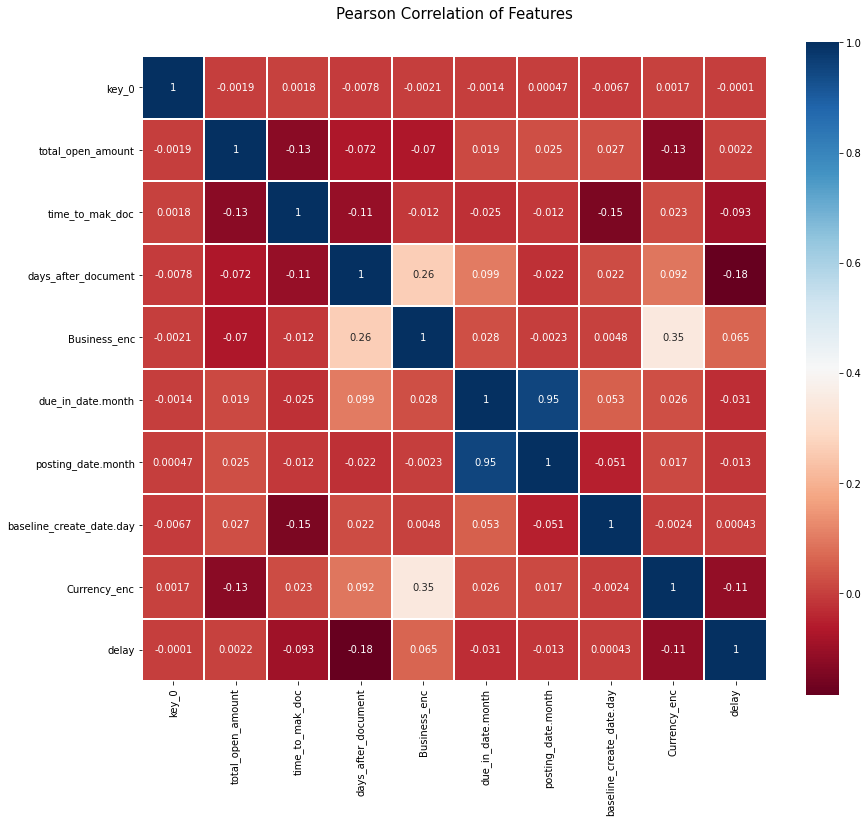

In [84]:
# we are checking for correlation between the different columns and delay columnand we can also infer that some columns have outliers
#present hence we should a classifier model
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train,on = X_train.index).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Modelling

## Linear Regression Model

In [85]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, Y_train)

LinearRegression()

In [86]:
y_predict = base_model.predict(x_val)

In [87]:
y_predict

array([ 4.47132873,  1.11860504,  4.55476542, ...,  1.66871725,
       12.68060473,  1.65017937])

In [88]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

7.237211030449344

## Decision Tree Model

In [89]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [90]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [91]:
y_predict2 = regressor.predict(x_val)

In [92]:
mean_squared_error(y_val, y_predict2, squared=False)

6.614084011260789

## XGBoost Model

In [93]:
import xgboost as xgb

In [94]:
xg_r=xgb.XGBRegressor(objective='reg:linear',n_estimators=10,seed=123)
xg_r.fit(X_train,Y_train)
y_pred_val_xg=xg_r.predict(x_val)
print('root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_val,y_pred_val_xg)))
y_pred_test_xg=xg_r.predict(x_test)
print('root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test,y_pred_test_xg)))

[12:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
root Mean squared error: 6.38
root Mean squared error: 7.45


## LightGBM Model

In [95]:
from lightgbm import LGBMClassifier

In [96]:
model = LGBMClassifier()

In [97]:
model.fit(X_train, Y_train)

LGBMClassifier()

In [98]:
Y_predicted3=model.predict(x_val)

In [99]:
mean_squared_error(y_val, Y_predicted3, squared=False)

7.6765781924181935

## CatBoost Model

In [100]:
from catboost import CatBoostRegressor

In [101]:
Cmodel=CatBoostRegressor(iterations=1, depth=3, learning_rate=0.1, loss_function='RMSE')
Cmodel.fit(X_train, Y_train,eval_set=(x_val, y_val),plot=False)

0:	learn: 10.5167612	test: 7.5428582	best: 7.5428582 (0)	total: 194ms	remaining: 0us

bestTest = 7.542858187
bestIteration = 0



In [102]:
Y_predicted4=Cmodel.predict(x_val)
mean_squared_error(y_val, Y_predicted4, squared=False)

7.54285818718824

### We can see that out of all the models XGBoost gave us the least RMSE value hence we will be using this for prediction

# Predicting The Main Test Data

### Now we have to make the same features we made on the train data set to the test dataset

In [103]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10723,U001,0200772670,ASSOCIAT corporation,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,2467.53,2020-02-27,NAU5,1.930577e+09,1
26418,U001,0200761734,H E BUT systems,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,53703.88,2020-02-27,NAA8,1.930578e+09,1
10123,U001,0200749225,SUPER associates,NaT,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,44436.71,2020-02-27,NAA8,1.930574e+09,1
97,U001,0200759878,SA corporation,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,39867.72,2020-02-27,NAH4,1.930577e+09,1
8658,U001,0200723794,MID MO associates,NaT,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-05-02,USD,RV,1.0,21631.84,2020-02-27,NAGD,1.930576e+09,1


In [104]:
X_train.head()

,total_open_amount,time_to_mak_doc,days_after_document,Business_enc,due_in_date.month,posting_date.month,baseline_create_date.day,Currency_enc
17979,10474,0,15,1,1,12,30,1
49200,10045,0,30,4,1,12,30,1
6748,33537,0,15,1,1,12,30,1
36062,32400,0,15,1,1,12,30,1
41510,3748,0,15,1,1,12,30,1


In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   total_open_amount         29880 non-null  int32
 1   time_to_mak_doc           29880 non-null  int64
 2   days_after_document       29880 non-null  int64
 3   Business_enc              29880 non-null  int32
 4   due_in_date.month         29880 non-null  int64
 5   posting_date.month        29880 non-null  int64
 6   baseline_create_date.day  29880 non-null  int64
 7   Currency_enc              29880 non-null  int32
dtypes: int32(3), int64(5)
memory usage: 1.7 MB


In [106]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  float64       
 5   doc_id                  10000 non-null  float64       
 6   posting_date            10000 non-null  datetime64[ns]
 7   document_create_date    10000 non-null  datetime64[ns]
 8   document_create_date.1  10000 non-null  datetime64[ns]
 9   due_in_date             10000 non-null  datetime64[ns]
 10  invoice_currency        10000 non-null  object        
 11  document type           10000 non-null  object        
 12  posting_id              10000 non-null  fl

In [107]:
#using model_data as a new data set to keep the useful features from test_data
Model_data=test_data[["business_code","total_open_amount","clear_date","posting_date","document_create_date.1","due_in_date","invoice_currency","baseline_create_date"]]

In [108]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   total_open_amount       10000 non-null  float64       
 2   clear_date              0 non-null      datetime64[ns]
 3   posting_date            10000 non-null  datetime64[ns]
 4   document_create_date.1  10000 non-null  datetime64[ns]
 5   due_in_date             10000 non-null  datetime64[ns]
 6   invoice_currency        10000 non-null  object        
 7   baseline_create_date    10000 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), object(2)
memory usage: 703.1+ KB


In [109]:
Business_encoder = LabelEncoder()
Business_encoder.fit(Model_data['business_code'])
Model_data['Business_enc'] = Business_encoder.transform(Model_data['business_code'])

In [110]:
Model_data.drop(["business_code"],axis=1,inplace=True)

In [111]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_open_amount       10000 non-null  float64       
 1   clear_date              0 non-null      datetime64[ns]
 2   posting_date            10000 non-null  datetime64[ns]
 3   document_create_date.1  10000 non-null  datetime64[ns]
 4   due_in_date             10000 non-null  datetime64[ns]
 5   invoice_currency        10000 non-null  object        
 6   baseline_create_date    10000 non-null  datetime64[ns]
 7   Business_enc            10000 non-null  int32         
dtypes: datetime64[ns](5), float64(1), int32(1), object(1)
memory usage: 664.1+ KB


In [112]:
Currency_encoder = LabelEncoder()
Currency_encoder.fit(Model_data["invoice_currency"])
Model_data["Currency_enc"] = Currency_encoder.transform(Model_data["invoice_currency"])

In [113]:
Model_data.drop(["invoice_currency"],axis=1,inplace=True)

In [114]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_open_amount       10000 non-null  float64       
 1   clear_date              0 non-null      datetime64[ns]
 2   posting_date            10000 non-null  datetime64[ns]
 3   document_create_date.1  10000 non-null  datetime64[ns]
 4   due_in_date             10000 non-null  datetime64[ns]
 5   baseline_create_date    10000 non-null  datetime64[ns]
 6   Business_enc            10000 non-null  int32         
 7   Currency_enc            10000 non-null  int32         
dtypes: datetime64[ns](5), float64(1), int32(2)
memory usage: 625.0 KB


In [115]:
Model_data["total_open_amount"]=Model_data["total_open_amount"].astype(int)

In [116]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_open_amount       10000 non-null  int32         
 1   clear_date              0 non-null      datetime64[ns]
 2   posting_date            10000 non-null  datetime64[ns]
 3   document_create_date.1  10000 non-null  datetime64[ns]
 4   due_in_date             10000 non-null  datetime64[ns]
 5   baseline_create_date    10000 non-null  datetime64[ns]
 6   Business_enc            10000 non-null  int32         
 7   Currency_enc            10000 non-null  int32         
dtypes: datetime64[ns](5), int32(3)
memory usage: 585.9 KB


In [117]:
Model_data["posting_date.month"]=Model_data["posting_date"].dt.month
Model_data.drop(["posting_date"],axis=1,inplace=True)

In [118]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_open_amount       10000 non-null  int32         
 1   clear_date              0 non-null      datetime64[ns]
 2   document_create_date.1  10000 non-null  datetime64[ns]
 3   due_in_date             10000 non-null  datetime64[ns]
 4   baseline_create_date    10000 non-null  datetime64[ns]
 5   Business_enc            10000 non-null  int32         
 6   Currency_enc            10000 non-null  int32         
 7   posting_date.month      10000 non-null  int64         
dtypes: datetime64[ns](4), int32(3), int64(1)
memory usage: 585.9 KB


In [119]:
Model_data["time_to_mak_doc"]=(Model_data["document_create_date.1"]-Model_data["baseline_create_date"]).dt.days
Model_data['days_after_document']=(Model_data['due_in_date']-Model_data['document_create_date.1']).dt.days

In [120]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_open_amount       10000 non-null  int32         
 1   clear_date              0 non-null      datetime64[ns]
 2   document_create_date.1  10000 non-null  datetime64[ns]
 3   due_in_date             10000 non-null  datetime64[ns]
 4   baseline_create_date    10000 non-null  datetime64[ns]
 5   Business_enc            10000 non-null  int32         
 6   Currency_enc            10000 non-null  int32         
 7   posting_date.month      10000 non-null  int64         
 8   time_to_mak_doc         10000 non-null  int64         
 9   days_after_document     10000 non-null  int64         
dtypes: datetime64[ns](4), int32(3), int64(3)
memory usage: 742.2 KB


In [121]:
Model_data["due_in_date.month"]=Model_data["due_in_date"].dt.month
Model_data.drop(["due_in_date"],axis=1,inplace=True)

In [122]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_open_amount       10000 non-null  int32         
 1   clear_date              0 non-null      datetime64[ns]
 2   document_create_date.1  10000 non-null  datetime64[ns]
 3   baseline_create_date    10000 non-null  datetime64[ns]
 4   Business_enc            10000 non-null  int32         
 5   Currency_enc            10000 non-null  int32         
 6   posting_date.month      10000 non-null  int64         
 7   time_to_mak_doc         10000 non-null  int64         
 8   days_after_document     10000 non-null  int64         
 9   due_in_date.month       10000 non-null  int64         
dtypes: datetime64[ns](3), int32(3), int64(4)
memory usage: 742.2 KB


In [123]:
Model_data.drop(["document_create_date.1"],axis=1,inplace=True)

In [124]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_open_amount     10000 non-null  int32         
 1   clear_date            0 non-null      datetime64[ns]
 2   baseline_create_date  10000 non-null  datetime64[ns]
 3   Business_enc          10000 non-null  int32         
 4   Currency_enc          10000 non-null  int32         
 5   posting_date.month    10000 non-null  int64         
 6   time_to_mak_doc       10000 non-null  int64         
 7   days_after_document   10000 non-null  int64         
 8   due_in_date.month     10000 non-null  int64         
dtypes: datetime64[ns](2), int32(3), int64(4)
memory usage: 664.1 KB


In [125]:
Model_data["baseline_create_date.day"]=Model_data["baseline_create_date"].dt.day
Model_data.drop(["baseline_create_date"],axis=1,inplace=True)

In [126]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_open_amount         10000 non-null  int32         
 1   clear_date                0 non-null      datetime64[ns]
 2   Business_enc              10000 non-null  int32         
 3   Currency_enc              10000 non-null  int32         
 4   posting_date.month        10000 non-null  int64         
 5   time_to_mak_doc           10000 non-null  int64         
 6   days_after_document       10000 non-null  int64         
 7   due_in_date.month         10000 non-null  int64         
 8   baseline_create_date.day  10000 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(5)
memory usage: 664.1 KB


In [127]:
Model_data.drop(["clear_date"],axis=1,inplace=True)

In [128]:
Model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10723 to 34103
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   total_open_amount         10000 non-null  int32
 1   Business_enc              10000 non-null  int32
 2   Currency_enc              10000 non-null  int32
 3   posting_date.month        10000 non-null  int64
 4   time_to_mak_doc           10000 non-null  int64
 5   days_after_document       10000 non-null  int64
 6   due_in_date.month         10000 non-null  int64
 7   baseline_create_date.day  10000 non-null  int64
dtypes: int32(3), int64(5)
memory usage: 585.9 KB


In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29880 entries, 17979 to 48109
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   total_open_amount         29880 non-null  int32
 1   time_to_mak_doc           29880 non-null  int64
 2   days_after_document       29880 non-null  int64
 3   Business_enc              29880 non-null  int32
 4   due_in_date.month         29880 non-null  int64
 5   posting_date.month        29880 non-null  int64
 6   baseline_create_date.day  29880 non-null  int64
 7   Currency_enc              29880 non-null  int32
dtypes: int32(3), int64(5)
memory usage: 1.7 MB


In [130]:
#Using the xgboost model as it showed the best RMSE value
Y_predicted5=xg_r.predict(Model_data)

In [131]:
test_data["delay"]=Y_predicted5.astype(int)

In [132]:
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
10723,U001,0200772670,ASSOCIAT corporation,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,2467.53,2020-02-27,NAU5,1.930577e+09,1,4
26418,U001,0200761734,H E BUT systems,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,53703.88,2020-02-27,NAA8,1.930578e+09,1,3
10123,U001,0200749225,SUPER associates,NaT,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,44436.71,2020-02-27,NAA8,1.930574e+09,1,3
97,U001,0200759878,SA corporation,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,39867.72,2020-02-27,NAH4,1.930577e+09,1,3
8658,U001,0200723794,MID MO associates,NaT,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-05-02,USD,RV,1.0,21631.84,2020-02-27,NAGD,1.930576e+09,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44647,CA02,0140104392,FLANAG llc,NaT,2020.0,2.960634e+09,2020-05-14,2020-05-14,2020-05-14,2020-05-24,CAD,RV,1.0,7032.80,2020-05-14,CA10,2.960634e+09,1,7
30814,U001,0200915438,GROC corporation,NaT,2020.0,1.930905e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,24212.00,2020-05-15,NAA8,1.930905e+09,1,6
5065,U001,0200759878,SA associates,NaT,2020.0,1.930897e+09,2020-05-17,2020-05-13,2020-05-17,2020-06-01,USD,RV,1.0,22835.50,2020-05-17,NAH4,1.930897e+09,1,6
9870,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,USD,RV,1.0,16099.20,2020-05-18,NAA8,1.930915e+09,1,6


In [133]:
#adding values to the clear date column by adding the predicted delay to the due_in_date
test_data["clear_date"]=test_data["due_in_date"]+pd.to_timedelta(test_data["delay"],unit="days")

In [134]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
10723,U001,0200772670,ASSOCIAT corporation,2020-03-17,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,2467.53,2020-02-27,NAU5,1.930577e+09,1,4
26418,U001,0200761734,H E BUT systems,2020-03-16,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,53703.88,2020-02-27,NAA8,1.930578e+09,1,3
10123,U001,0200749225,SUPER associates,2020-03-16,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,44436.71,2020-02-27,NAA8,1.930574e+09,1,3
97,U001,0200759878,SA corporation,2020-03-16,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,39867.72,2020-02-27,NAH4,1.930577e+09,1,3
8658,U001,0200723794,MID MO associates,2020-05-05,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-05-02,USD,RV,1.0,21631.84,2020-02-27,NAGD,1.930576e+09,1,3


In [135]:
test_data["delay"].describe()

count    10000.000000
mean         5.205900
std          3.677725
min          0.000000
25%          3.000000
50%          6.000000
75%          6.000000
max         56.000000
Name: delay, dtype: float64

# Adding aging bucket

In [136]:
bin_rnges=[-365,15,30,45,60,365]
bin_name=["0-15 days","16-30 days","30-45 days","45-60 days",">60 days"]
test_data["aging bucket"]=pd.cut(test_data["delay"],bins=bin_rnges,labels=bin_name)

In [137]:
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,aging bucket
10723,U001,0200772670,ASSOCIAT corporation,2020-03-17,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,2467.53,2020-02-27,NAU5,1.930577e+09,1,4,0-15 days
26418,U001,0200761734,H E BUT systems,2020-03-16,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,53703.88,2020-02-27,NAA8,1.930578e+09,1,3,0-15 days
10123,U001,0200749225,SUPER associates,2020-03-16,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,44436.71,2020-02-27,NAA8,1.930574e+09,1,3,0-15 days
97,U001,0200759878,SA corporation,2020-03-16,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,39867.72,2020-02-27,NAH4,1.930577e+09,1,3,0-15 days
8658,U001,0200723794,MID MO associates,2020-05-05,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-05-02,USD,RV,1.0,21631.84,2020-02-27,NAGD,1.930576e+09,1,3,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44647,CA02,0140104392,FLANAG llc,2020-05-31,2020.0,2.960634e+09,2020-05-14,2020-05-14,2020-05-14,2020-05-24,CAD,RV,1.0,7032.80,2020-05-14,CA10,2.960634e+09,1,7,0-15 days
30814,U001,0200915438,GROC corporation,2020-06-05,2020.0,1.930905e+09,2020-05-15,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,24212.00,2020-05-15,NAA8,1.930905e+09,1,6,0-15 days
5065,U001,0200759878,SA associates,2020-06-07,2020.0,1.930897e+09,2020-05-17,2020-05-13,2020-05-17,2020-06-01,USD,RV,1.0,22835.50,2020-05-17,NAH4,1.930897e+09,1,6,0-15 days
9870,U001,200765011,MAINES systems,2020-06-08,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,USD,RV,1.0,16099.20,2020-05-18,NAA8,1.930915e+09,1,6,0-15 days


In [141]:
result=test_data[["cust_number","name_customer","invoice_id","total_open_amount","due_in_date","clear_date"]]

In [142]:
result.to_csv("Predicted Dataset.csv")